## 앙상블(Ensemble)

## Bagging meta-estimator
    * bagging은 bootstrap aggregating의 줄임말
    * 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
    * 각각의 결과를 결합해 최종 결과를 생성
    * 분산을 줄이고 과적합을 막음
    * 강력하고 복잡한 모델에서 잘 동작

### 필요한 데이터 셋

In [5]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

### 분류 모델

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

## Bagging을 사용한 분류

데이터셋 불러오기

In [47]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

## KNN
붓꽃 데이터

In [6]:
# 베이스 모델
# 데이터 모델링하기 하기전에는 반드시 스케일링 과정을 거쳐야함
# StandardScaler() : 스케일러(기본 스케일. 평균과 표준편차 사용)
base_model = make_pipeline(StandardScaler(),
                          KNeighborsClassifier()) # KNN모델 만듬
# 베이스 모델을 사용한 배깅 모델
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5) # Bagging KNN 모델 만듬

#### 분류기에 사용되는 매개변수
* n_estimators : 앙상블에 사용할 분류기의 수
* max_samples : 무작위로 뽑을 샘플의 수(0~1사이의 수로 지정하면 비율이 되어, 훈련세트에 곱한 값만큼 샘플링)
* max_features: 최대 feature의 수


In [94]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model, # 베이스 모델을 기준으로 측정하기에 estimator에 base_model 넣음
    X = iris.data, y=iris.target, # x는 train set, y는 test set
    cv = 5)
# 교차검증을 통해 해당 모델의 정확성, 작동하는데 걸린 시간 등을 알 수 있음
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.000997161865234375 (+/- 0.0006300730440237418)
avg score time: 0.0005981922149658203 (+/- 0.0004884219525686784)
avg test score: 0.9666666666666668 (+/- 0.036514837167011066)


In [13]:
# 배깅 모델 사용
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y=iris.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.025741004943847658 (+/- 0.008077372485481899)
avg score time: 0.007978057861328125 (+/- 0.0025246817185969007)
avg test time: 0.9466666666666667 (+/- 0.02666666666666666)


와인 데이터

In [14]:
base_model = make_pipeline(StandardScaler(),
                          KNeighborsClassifier())
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [15]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y=wine.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0016780853271484374 (+/- 0.0003993640755217273)
avg score time: 0.001983451843261719 (+/- 0.0007183377684475229)
avg test time: 0.9491432609079669 (+/- 0.04248798060692306)


In [16]:
# 배깅 모델을 사용
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y=wine.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02321038246154785 (+/- 0.006207383424935025)
avg score time: 0.009382963180541992 (+/- 0.004014614632127036)
avg test time: 0.9389860448683978 (+/- 0.04652794459066121)


유방암 데이터

In [17]:
base_model = make_pipeline(StandardScaler(),
                          KNeighborsClassifier())
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [18]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y=cancer.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.016733455657958984 (+/- 0.030030833389749184)
avg score time: 0.004862022399902344 (+/- 0.0008569797268853454)
avg test time: 0.9648787995382839 (+/- 0.009558823167510602)


In [19]:
# 배깅 모델을 사용
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y=cancer.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.034120368957519534 (+/- 0.011464327218748993)
avg score time: 0.027478361129760744 (+/- 0.011747081593683515)
avg test time: 0.9666794921123507 (+/- 0.01141745350130991)


## SVC
붓꽃 데이터

In [23]:
base_model = # base_model을 만드는 코드을 적으세요
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [24]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model,
    X = , y = , # x, y에 알맞은 데이터를 넣으세요
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002489185333251953 (+/- 0.001777625413767814)
avg score time: 0.0009961605072021484 (+/- 1.6128096127784504e-06)
avg test time: 0.9666666666666666 (+/- 0.02108185106778919)


In [25]:
# 배깅 모델을 사용
# 배깅 모델을 사용해 avg fit time, avg score time, avg test score 구하세요

avg fit time: 0.044226646423339844 (+/- 0.008163477857774288)
avg score time: 0.0043365478515625 (+/- 0.00042893784193546834)
avg test time: 0.9533333333333334 (+/- 0.016329931618554516)


와인 데이터

In [26]:
base_model = make_pipeline(StandardScaler(),
                          SVC())
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [27]:
# 베이스 모델을 사용
# 베이스 모델을 사용해 avg fit time, avg score time, avg test score 구하세요

avg fit time: 0.002425813674926758 (+/- 0.00046871740703935465)
avg score time: 0.0006308078765869141 (+/- 0.0005167324007883471)
avg test time: 0.9833333333333334 (+/- 0.022222222222222233)


In [28]:
# 배깅 모델을 사용
# 배깅 모델을 사용해 avg fit time, avg score time, avg test score 구하세요
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.050083494186401366 (+/- 0.012961896968874209)
avg score time: 0.006974220275878906 (+/- 0.0060880194453546135)
avg test time: 0.9725225225225225 (+/- 0.03490337050055951)


유방암 데이터

In [29]:
base_model = make_pipeline(StandardScaler(),
                          SVC())
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [30]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y=cancer.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.010570764541625977 (+/- 0.0023257158395516794)
avg score time: 0.002005338668823242 (+/- 0.0006314886287352744)
avg test time: 0.9754367064255483 (+/- 0.01289533962757828)


In [31]:
# 배깅 모델을 사용
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y=cancer.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04123697280883789 (+/- 0.024349859813126942)
avg score time: 0.008140897750854493 (+/- 0.005270080100327521)
avg test time: 0.9614621008080031 (+/- 0.017808744236995622)


## Decision Tree
붓꽃 데이터

In [32]:
base_model = make_pipeline(StandardScaler(),
                          DecisionTreeClassifier())
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [33]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y=iris.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002398252487182617 (+/- 0.0018634193375521)
avg score time: 0.0006342887878417969 (+/- 0.0005223788087610081)
avg test time: 0.9666666666666668 (+/- 0.036514837167011066)


In [34]:
# 배깅 모델 사용
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y=iris.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04406161308288574 (+/- 0.0049051820758417965)
avg score time: 0.003792285919189453 (+/- 0.0011668878114207573)
avg test time: 0.9600000000000002 (+/- 0.03265986323710903)


와인 데이터

In [35]:
base_model = make_pipeline(StandardScaler(),
                          DecisionTreeClassifier())
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [36]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y=wine.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0020802497863769533 (+/- 0.0006456582792934404)
avg score time: 0.0009576320648193359 (+/- 0.00018046309061715366)
avg test time: 0.8930850177909001 (+/- 0.0281764543063328)


In [37]:
# 배깅 모델 사용
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y=wine.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04828710556030273 (+/- 0.014446717825012436)
avg score time: 0.00409245491027832 (+/- 0.0025297131598050215)
avg test time: 0.933598556539733 (+/- 0.03981956531960979)


유방암 데이터

In [38]:
base_model = make_pipeline(StandardScaler(),
                          DecisionTreeClassifier())
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [41]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y=cancer.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01337447166442871 (+/- 0.00204424362302585)
avg score time: 0.0006889820098876954 (+/- 0.00039609604176404033)
avg test time: 0.9226779530588688 (+/- 0.020425124294259328)


In [42]:
# 배깅 모델 사용
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y=cancer.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0498929500579834 (+/- 0.017878022424455874)
avg score time: 0.0025629520416259764 (+/- 0.001212846906091769)
avg test time: 0.9474567141208157 (+/- 0.021706569369447006)


## Bagging을 사용한 회귀
### 데이터셋 불러오기

In [3]:
boston = load_boston()
diabetes = load_diabetes()

## KNN
### 보스턴 주택 가격 데이터

In [16]:
base_model = make_pipeline(StandardScaler(),
                          KNeighborsRegressor())
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [17]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y=boston.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0030362606048583984 (+/- 0.0006372055250034489)
avg score time: 0.004662179946899414 (+/- 0.0007575483974002524)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [18]:
# 배깅 모델을 사용
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y=boston.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0237581729888916 (+/- 0.005404454348695551)
avg score time: 0.012274742126464844 (+/- 0.0017850118689401297)
avg test score: 0.4655934204922253 (+/- 0.12771579962497143)


### 당뇨병 데이터

In [19]:
base_model = make_pipeline(StandardScaler(),
                          KNeighborsRegressor())
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [20]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y=diabetes.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0018259525299072266 (+/- 0.0008906635711636496)
avg score time: 0.0023264408111572264 (+/- 0.0006815094123007106)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [21]:
# 배깅 모델을 사용
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y=diabetes.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.029279613494873048 (+/- 0.010075521310583466)
avg score time: 0.013162469863891602 (+/- 0.003779902633811534)
avg test score: 0.3895994771152272 (+/- 0.07742169422376438)


## SVR
### 보스턴 주택 가격 데이터

In [22]:
# SVR을 사용해 base_model과 bagging_model을 만드세요
base_model = 
bagging_model=

In [23]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y=boston.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01517801284790039 (+/- 0.005352924946632654)
avg score time: 0.003275442123413086 (+/- 0.001134770476946208)
avg test score: 0.17576105975002373 (+/- 0.5222609751309495)


In [24]:
# 배깅 모델을 사용
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y=boston.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.045258522033691406 (+/- 0.016199332405384684)
avg score time: 0.00779256820678711 (+/- 0.0009794733249330707)
avg test score: 0.1715784061227245 (+/- 0.3485547385791566)


### 당뇨병 데이터

In [25]:
base_model = make_pipeline(StandardScaler(),
                          SVR())
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [26]:
# 베이스 모델을 사용
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y=diabetes.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.010656023025512695 (+/- 0.0033867469268453344)
avg score time: 0.002451801300048828 (+/- 0.0007237115849959581)
avg test score: 0.14659936199629425 (+/- 0.021907980033429333)


In [ ]:
# 배깅 모델을 사용
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y=diabetes.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

## Random Forest
* sklearn.ensemble 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
    + Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

## Random Forest 분류

In [50]:
# 랜덤포레스트 모델 만드는 코드를 적으세요
model = 

In [51]:
# 랜덤포레스트 모델과 붓꽃 데이터(iris)를 이용해 avg fit time, avg score time, avg test score 구하세요

avg fit time: 0.02154698371887207 (+/- 0.006864417215112443)
avg score time: 0.0021935462951660155 (+/- 0.000976727628158069)
avg test time: 0.96 (+/- 0.024944382578492935)


In [52]:
# 랜덤포레스트 모델과 와인 데이터(wine)를 이용해 avg fit time, avg score time, avg test score 구하세요

avg fit time: 0.027926254272460937 (+/- 0.004285122381779089)
avg score time: 0.0023934364318847655 (+/- 0.000487489272239311)
avg test time: 0.9556527115350646 (+/- 0.05031879833175383)


In [53]:
# 랜덤포레스트 모델과 유방암 데이터(cancer)를 이용해 avg fit time, avg score time, avg test score 구하세요

avg fit time: 0.035094404220581056 (+/- 0.00863908301205295)
avg score time: 0.0015563488006591797 (+/- 0.0010956806139949219)
avg test time: 0.9526741054251634 (+/- 0.01774662809735697)


## Random Forest 회귀

In [30]:
model = make_pipeline(
StandardScaler(),
RandomForestRegressor())

In [33]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y=boston.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04477839469909668 (+/- 0.0069998505277556805)
avg score time: 0.001596355438232422 (+/- 0.0004884421234432124)
avg test score: 0.5969686833706713 (+/- 0.2545263475716094)


In [34]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y=diabetes.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03496103286743164 (+/- 0.005706687379095653)
avg score time: 0.0016398906707763671 (+/- 0.0004915337113763604)
avg test score: 0.37457484764906324 (+/- 0.07467012137230024)


## AdaBoost
* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습(가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
    + 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
    + 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

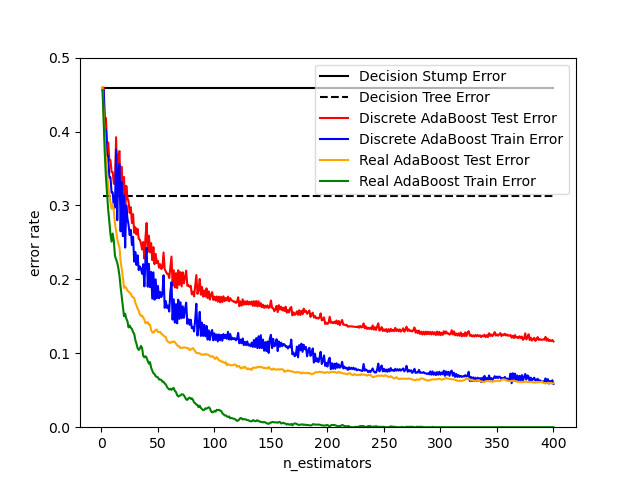

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

## AdaBoost 분류

In [62]:
model = make_pipeline(
StandardScaler(),
AdaBoostClassifier())

In [63]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y=iris.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.048280858993530275 (+/- 0.006793533418688257)
avg score time: 0.0025847434997558595 (+/- 0.0004810175847738571)
avg test time: 0.9466666666666667 (+/- 0.03399346342395189)


In [64]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y=wine.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06543240547180176 (+/- 0.013221354587432434)
avg score time: 0.0035649776458740235 (+/- 0.00046830406718599625)
avg test time: 0.831994851994852 (+/- 0.1641110134058623)


In [65]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y=cancer.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13586101531982422 (+/- 0.019408314386716467)
avg score time: 0.003980302810668945 (+/- 0.0006200122452591942)
avg test time: 0.9684801846864179 (+/- 0.01784403589719794)


## AdaBoost 회귀

In [40]:
model = make_pipeline(
StandardScaler(),
AdaBoostRegressor())

In [41]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y=boston.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.16894092559814453 (+/- 0.041805177120497694)
avg score time: 0.0053768157958984375 (+/- 0.0016297065586445417)
avg test score: 0.5572933967301037 (+/- 0.23438298444874814)


In [42]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y=diabetes.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10292420387268067 (+/- 0.032097207852561)
avg score time: 0.0032166481018066407 (+/- 0.0009733450636123211)
avg test score: 0.42036880010354283 (+/- 0.05260344216036511)


## Gradient Tree Boosting
* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

## Gradient Tree Boosting 분류

In [44]:
model = make_pipeline(
StandardScaler(),
GradientBoostingClassifier())

In [45]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y=iris.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.33830785751342773 (+/- 0.11037811931714482)
avg score time: 0.001402902603149414 (+/- 0.00045039609289912154)
avg test score: 0.96 (+/- 0.024944382578492935)


In [48]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y=wine.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.44014782905578614 (+/- 0.18443954761158343)
avg score time: 0.0012476444244384766 (+/- 0.0007510563371615295)
avg test score: 0.9172321901733665 (+/- 0.061079415170305316)


In [50]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y=cancer.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.21226153373718262 (+/- 0.025982709478183895)
avg score time: 0.0011637687683105468 (+/- 0.0004120105222500061)
avg test score: 0.8113348094724533 (+/- 0.07165371019112217)


## Gradient Tree Boosting 회귀

In [49]:
model = make_pipeline(
StandardScaler(),
GradientBoostingRegressor())

In [51]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y=boston.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06742839813232422 (+/- 0.02329191271786068)
avg score time: 0.00079193115234375 (+/- 0.00039602908046017655)
avg test score: 0.6758413617033283 (+/- 0.15376951943107386)


In [52]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y=diabetes.target,
    cv = 5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05305566787719727 (+/- 0.01687816418133491)
avg score time: 0.0008064746856689453 (+/- 0.0007596382843466448)
avg test score: 0.408105451303153 (+/- 0.06584093398892721)


## 투표 기반 모델(Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
    + 가장 많이 예측된 클래스를 정답으로 채택(hard voting)
    + 예측된 확률의 가중치 평균(soft voting)

In [86]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings(action='ignore') # 에러 메시지 안 뜨게 하기 위함

## Hard Voting

In [87]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
# 각기 다른 알고리즘을 가진 모델을 이용해 투표 기반 모델 만듬
vote_model = VotingClassifier(
estimators = [('svc', model1), ('naive', model2), ('forest', model3)], # ('추정기 이름', 추정기)의 모음
voting = 'hard') # voting 속성으로 hard와 soft 지정


In [88]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %0.2f [%s]' %(scores.mean(), model_name))
     

Accuracy: 0.98 [SVC]
Accuracy: 0.95 [GaussianNB]
Accuracy: 0.97 [RandomForestClassifier]
Accuracy: 0.95 [VotingClassifier]


## Soft Voting

In [89]:
model1 = # 알맞은 모델을 적으시오. # svc모델을 soft voting에 사용하려면 probability=True로 설정해야한다.
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
estimators = # 알맞은 estimators를 적으세요(hard voting 참고),
voting = 'soft',
weights=[2,1,2]) # weights 가중치 (estimators에 하나씩 해당)

In [90]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %0.2f [%s]' %(scores.mean(), model_name))

Accuracy: 0.98 [SVC]
Accuracy: 0.95 [GaussianNB]
Accuracy: 0.95 [RandomForestClassifier]
Accuracy: 0.96 [VotingClassifier]
